In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import lammps_logfile

In [67]:
nat=500

# Load student GRACE-FS

In [73]:
ll_fs=lammps_logfile.File("lammps-grace-fs-dist/log.lammps")

In [74]:
len(ll_fs.partial_logs)

4

In [75]:
df_fs=pd.DataFrame(ll_fs.partial_logs[2])

In [76]:
df_fs.shape

(101, 17)

In [77]:
df_fs.head()

,Step,CPULeft,Temp,PotEng,Fmax,c_min_dist,f_AlLi[2],c_max_gamma,Press,Volume,Density,Pxx,Pyy,Pzz,Pxy,Pxz,Pyz
0,0.0,0.00000,517.55632,-1808.0303,1.561106,2.449014,0.0,0.683877,703.05921,8475.8372,2.544876,966.92392,234.44539,907.80832,482.25714,448.902880,-75.365217
1,500.0,213.38440,521.29720,-1807.4455,1.866691,2.444319,244.0,0.687366,-2110.99870,8519.7690,2.531753,-1113.18890,-3713.44470,-1506.36250,-350.43762,-79.191539,431.605300
2,1000.0,210.56279,536.67617,-1806.2723,1.719935,2.366687,454.0,0.686295,3342.62340,8468.1522,2.547185,3458.02170,3083.06530,3486.78310,-565.36278,581.749440,297.890660
3,1500.0,207.80912,502.67556,-1806.0465,1.701021,2.407725,683.0,0.711697,-1674.28610,8524.6117,2.530315,-834.97478,-5.51535,-4182.36810,-36.11667,16.604523,-989.470390
4,2000.0,205.62748,502.20604,-1807.0436,1.713413,2.462382,887.0,0.759620,3159.49310,8469.2815,2.546846,4149.61290,3616.36310,1712.50320,613.46638,-238.703080,-197.307090


Text(0, 0.5, 'Max extrapolation grade')

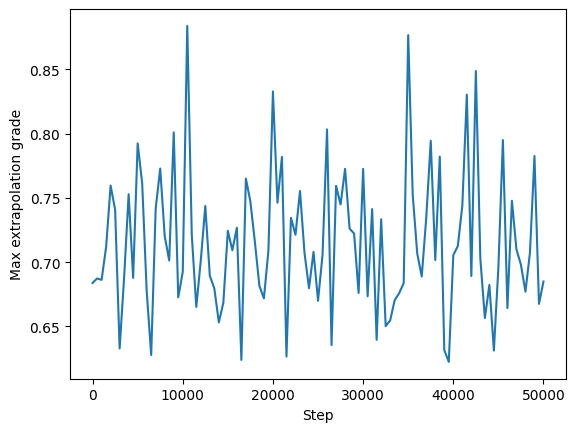

In [78]:
plt.plot(df_fs['Step'], df_fs['c_max_gamma'])
plt.xlabel('Step')
plt.ylabel("Max extrapolation grade")

# Load teacher GRACE-2L

In [79]:
ll_2l=lammps_logfile.File("lammps-grace-2L/log.lammps")

df_2l=pd.DataFrame(ll_2l.partial_logs[2])
df_2l.shape

(101, 16)

In [80]:
df_2l.head()

,Step,CPULeft,Temp,PotEng,Fmax,c_min_dist,f_AlLi[2],Press,Volume,Density,Pxx,Pyy,Pzz,Pxy,Pxz,Pyz
0,0.0,0.0000,512.81235,-1801.4478,2.018171,2.398315,0.0,-207.61606,8561.4896,2.519416,573.89026,-1036.71250,-160.02599,1574.86350,623.09911,317.55608
1,500.0,1645.3488,497.45954,-1803.5919,1.614980,2.460100,272.0,853.04716,8536.8346,2.526692,-140.96968,-439.12223,3139.23340,647.41777,-112.21111,-250.36391
2,1000.0,1475.0376,477.92158,-1803.2439,1.761544,2.452262,553.0,661.29856,8537.4498,2.526510,-670.28901,1215.45270,1438.73190,-454.09795,424.57204,-432.13593
3,1500.0,1409.3427,487.02108,-1801.8215,1.511536,2.368350,801.0,2975.80660,8522.9984,2.530794,3435.73010,3948.10490,1543.58470,892.65778,885.95666,-957.50757
4,2000.0,1369.1706,487.37451,-1800.7517,1.724825,2.444968,1053.0,3764.89330,8524.7010,2.530289,4005.94490,4912.48580,2376.24920,-634.87966,-179.47869,-277.08665


# Compare teacher vs student models

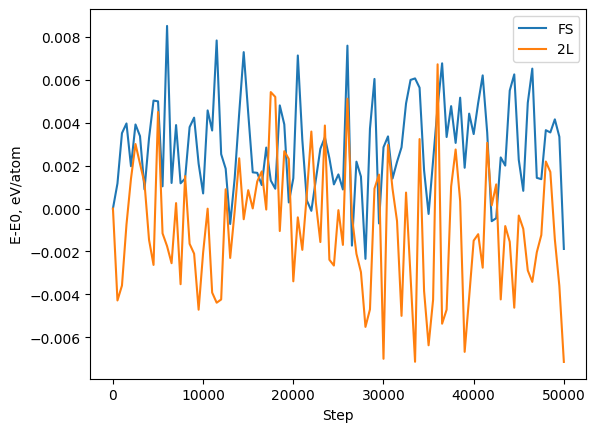

In [81]:
plt.plot(df_fs['Step'], (df_fs['PotEng']-df_fs.iloc[0]['PotEng'])/nat, label='FS')
plt.plot(df_2l['Step'], (df_2l['PotEng']-df_2l.iloc[0]['PotEng'])/nat, label='2L')
plt.xlabel("Step")
plt.ylabel("E-E0, eV/atom")
plt.legend()


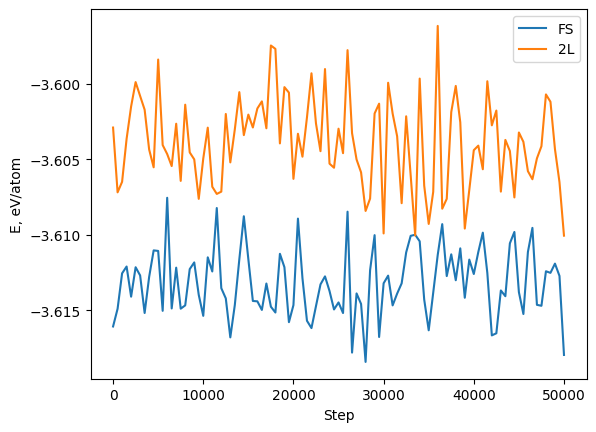

In [82]:
plt.plot(df_fs['Step'], (df_fs['PotEng'])/nat, label='FS')
plt.plot(df_2l['Step'], (df_2l['PotEng'])/nat, label='2L')
plt.xlabel("Step")
plt.ylabel("E, eV/atom")
plt.legend()


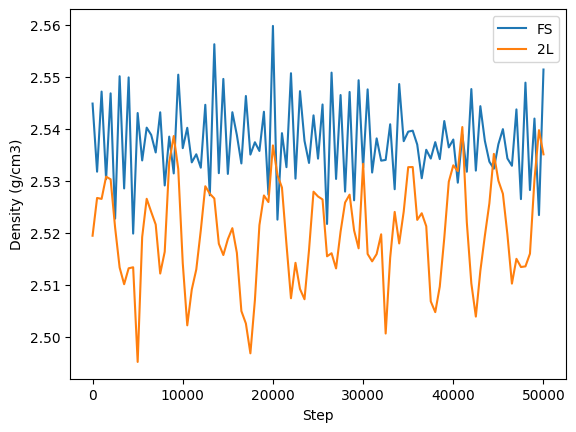

In [83]:
plt.plot(df_fs['Step'], df_fs['Density'], label='FS')
plt.plot(df_2l['Step'], df_2l['Density'], label='2L')
plt.xlabel("Step")
plt.ylabel("Density (g/cm3)")
plt.legend()


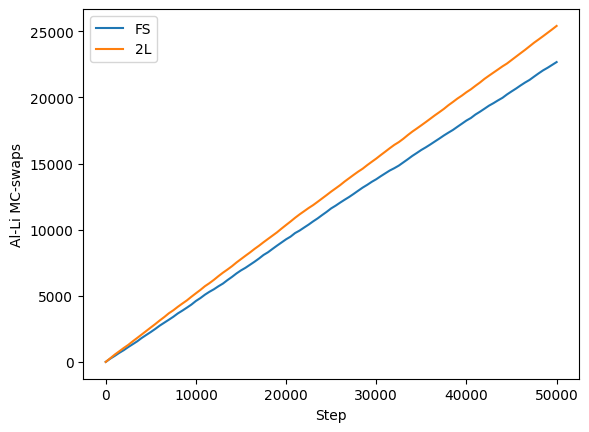

In [84]:
plt.plot(df_fs['Step'], df_fs['f_AlLi[2]'], label='FS')
plt.plot(df_2l['Step'], df_2l['f_AlLi[2]'], label='2L')
plt.xlabel("Step")
plt.ylabel("Al-Li MC-swaps")
plt.legend()
